Create heatmaps showing docking quality after testing diverse scenarios

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import os

/tmp/ipykernel_418153/1795126341.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = df.iloc[:, 1:-2].applymap(category_to_number.get)


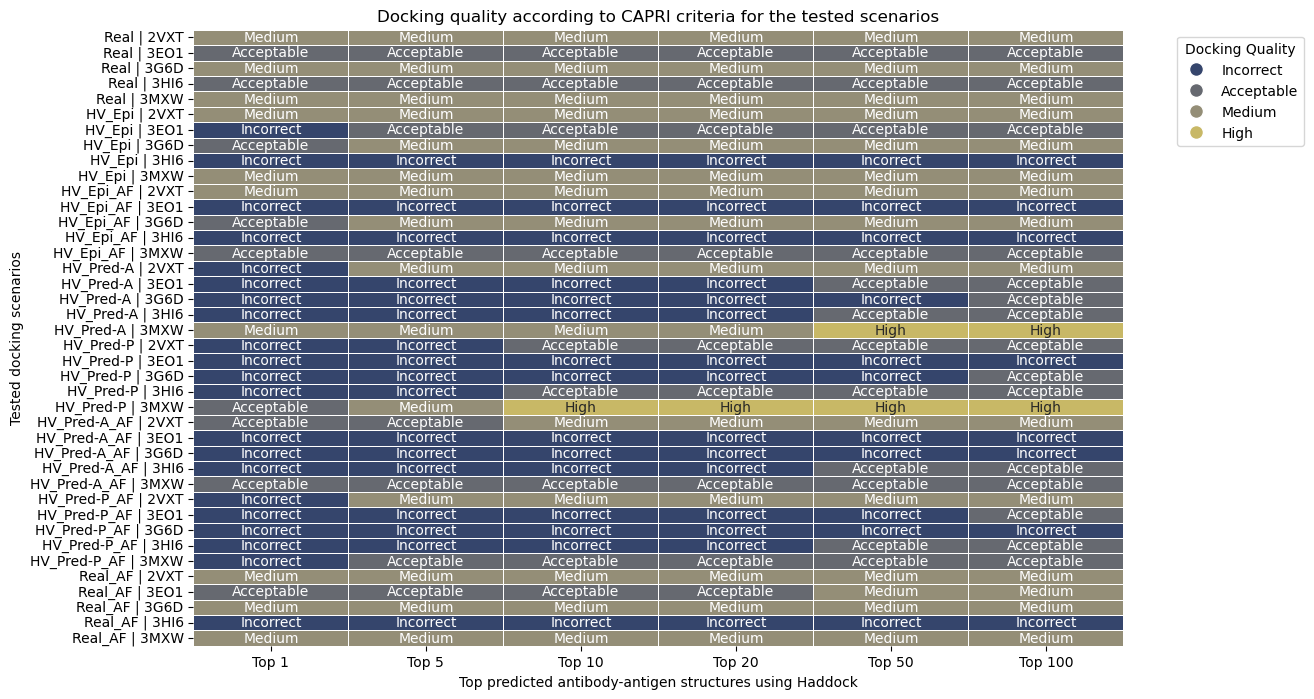

In [22]:
docking_scores_file = os.path.expanduser('~/Analysis_figures/Heatmap/docking_quality_scenarios.csv')
df = pd.read_csv(docking_scores_file)

# Specify the docking scenarios and analysed antibody antigen complexes
scenarios = ['HV_Pred-P_AF', 'HV_Pred-A_AF', 'HV_Pred-P', 'HV_Pred-A', 'AF_REAL', 'HV_Epi_AF', 'HV_Epi', 'Real']
complex_list = ['3MXW', '2VXT', '3EO1', '3HI6', '3G6D']

scen_csv = {'real': 'Real',
            'hv_epi': 'HV_Epi',
            'hv_epi_af': 'HV_Epi_AF',
            'AF_REAL': 'Real_AF',
            'hv_preda': 'HV_Pred-A',
            'hv_predp': 'HV_Pred-P',
            'hv_preda_af': 'HV_Pred-A_AF',
            'hv_predp_af': 'HV_Pred-P_AF'
            }

# Docking categories
categories = ['Incorrect', 'Acceptable', 'Medium', 'High']

df['Scenario'] = df['Complex_scenario'].str[5:]
df['Scenario'] = df['Scenario'].map(scen_csv.get)
df['Complex'] = df['Complex_scenario'].str[:4]
df['Labels'] = df['Scenario'] + ' | ' + df['Complex']
df.set_index('Labels', inplace=True)
df['Scenario'] = pd.Categorical(df['Scenario'], categories=scenarios, ordered=True)
df = df.sort_values(['Scenario', 'Complex'], ascending=[False, True])

# Define a colormap according to docking categories
colors = sns.color_palette("cividis", len(categories))

color_map = {
    'Incorrect': colors[0],
    'Acceptable': colors[1],
    'Medium': colors[2],
    'High': colors[3]
}

cmap = ListedColormap([color_map[category] for category in categories])
category_to_number = {category: i for i, category in enumerate(categories)}
numeric_df = df.iloc[:, 1:-2].applymap(category_to_number.get)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df, cmap=cmap, annot=df.iloc[:, 1:-2], fmt='', cbar=False, linewidths=0.5)
plt.title('Docking quality according to CAPRI criteria for the tested scenarios')
plt.xlabel('Top predicted antibody-antigen structures using Haddock')
plt.ylabel('Tested docking scenarios')
plt.xticks()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
                              markerfacecolor=color_map[category], markersize=10) for category in categories]
plt.legend(handles=legend_elements, title="Docking Quality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('heatmap_docking_scenarios.png', format='png')
plt.show()

/tmp/ipykernel_422136/1830570809.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = df.iloc[:, 1:-2].applymap(category_to_number.get)


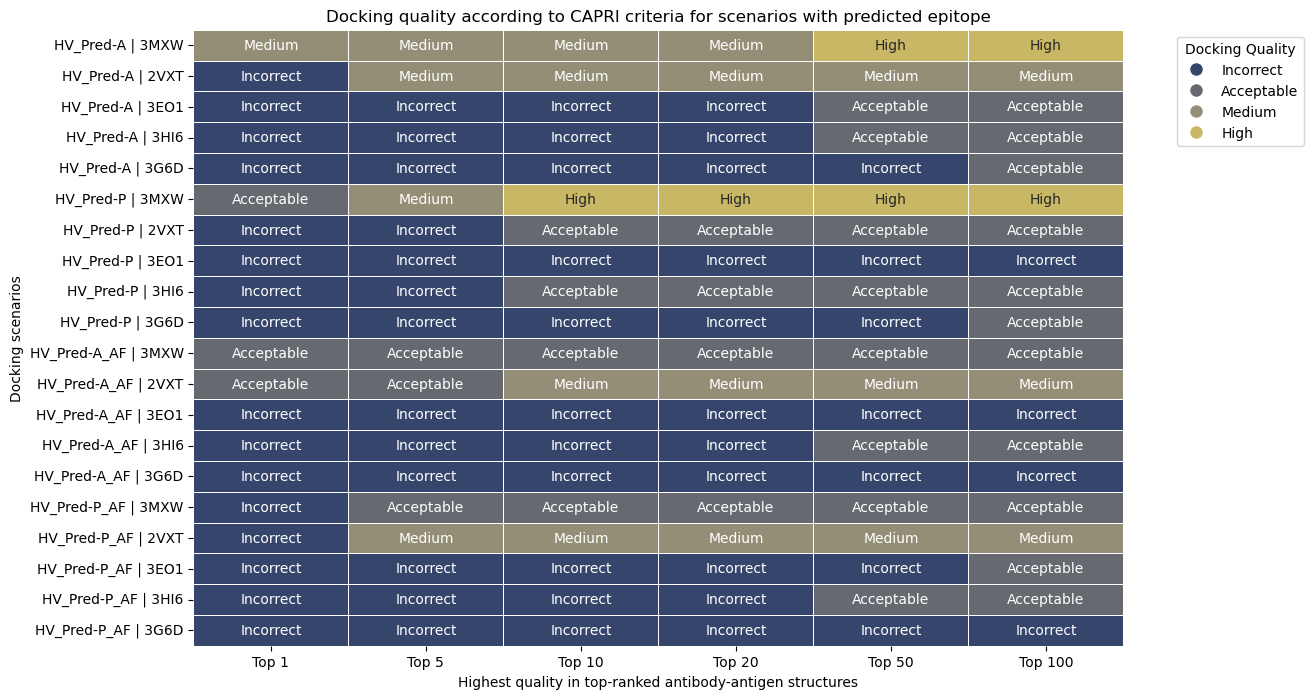

In [8]:
'''
Heatmap with docking quality for scenarios with predicted epitopes.
DockQ scores were calculated using target files with bound structure.
'''
docking_scores_file = os.path.expanduser('~/Analysis_figures/Heatmap/docking_quality_scenarios.csv')
df = pd.read_csv(docking_scores_file)

# Specify the docking scenarios and analysed antibody antigen complexes
scenarios = ['Real', 'HV_Epi', 'HV_Epi_AF', 'HV_Pred-A', 'HV_Pred-P', 'HV_Pred-A_AF', 'HV_Pred-P_AF']
complex_list = ['3MXW', '2VXT', '3EO1', '3HI6', '3G6D']

scen_csv = {'real': 'Real',
            'hv_epi': 'HV_Epi',
            'hv_epi_af': 'HV_Epi_AF',
            'hv_preda': 'HV_Pred-A',
            'hv_predp': 'HV_Pred-P',
            'hv_preda_af': 'HV_Pred-A_AF',
            'hv_predp_af': 'HV_Pred-P_AF'
            }

# Docking categories
categories = ['Incorrect', 'Acceptable', 'Medium', 'High']

df['Scenario'] = df['Complex_scenario'].str[5:]
df['Scenario'] = df['Scenario'].map(scen_csv.get)
df['Complex'] = df['Complex_scenario'].str[:4]
df['Labels'] = df['Scenario'] + ' | ' + df['Complex']
df.set_index('Labels', inplace=True)
df['Scenario'] = pd.Categorical(df['Scenario'], categories=scenarios, ordered=True)
df['Complex'] = pd.Categorical(df['Complex'], categories=complex_list, ordered=True)
df = df.sort_values(['Scenario', 'Complex'], ascending=[True, True])

# Split data frame according to scenarios
predictions_scenarios = scenarios = ['HV_Pred-A', 'HV_Pred-P', 'HV_Pred-A_AF', 'HV_Pred-P_AF']
df = df[df['Scenario'].isin(predictions_scenarios)]

# Define a colormap according to docking categories
colors = sns.color_palette("cividis", len(categories))

color_map = {
    'Incorrect': colors[0],
    'Acceptable': colors[1],
    'Medium': colors[2],
    'High': colors[3]
}

cmap = ListedColormap([color_map[category] for category in categories])
category_to_number = {category: i for i, category in enumerate(categories)}
numeric_df = df.iloc[:, 1:-2].applymap(category_to_number.get)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df, cmap=cmap, annot=df.iloc[:, 1:-2], fmt='', cbar=False, linewidths=0.5)
plt.title('Docking quality according to CAPRI criteria for scenarios with predicted epitope')
plt.xlabel('Highest quality in top-ranked antibody-antigen structures')
plt.ylabel('Docking scenarios')
plt.xticks()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
                              markerfacecolor=color_map[category], markersize=10) for category in categories]
plt.legend(handles=legend_elements, title="Docking Quality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('heatmap_docking_scenarios_pred.png', format='png')
plt.show()

/tmp/ipykernel_422136/4054472214.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = df.iloc[:, 1:-2].applymap(category_to_number.get)


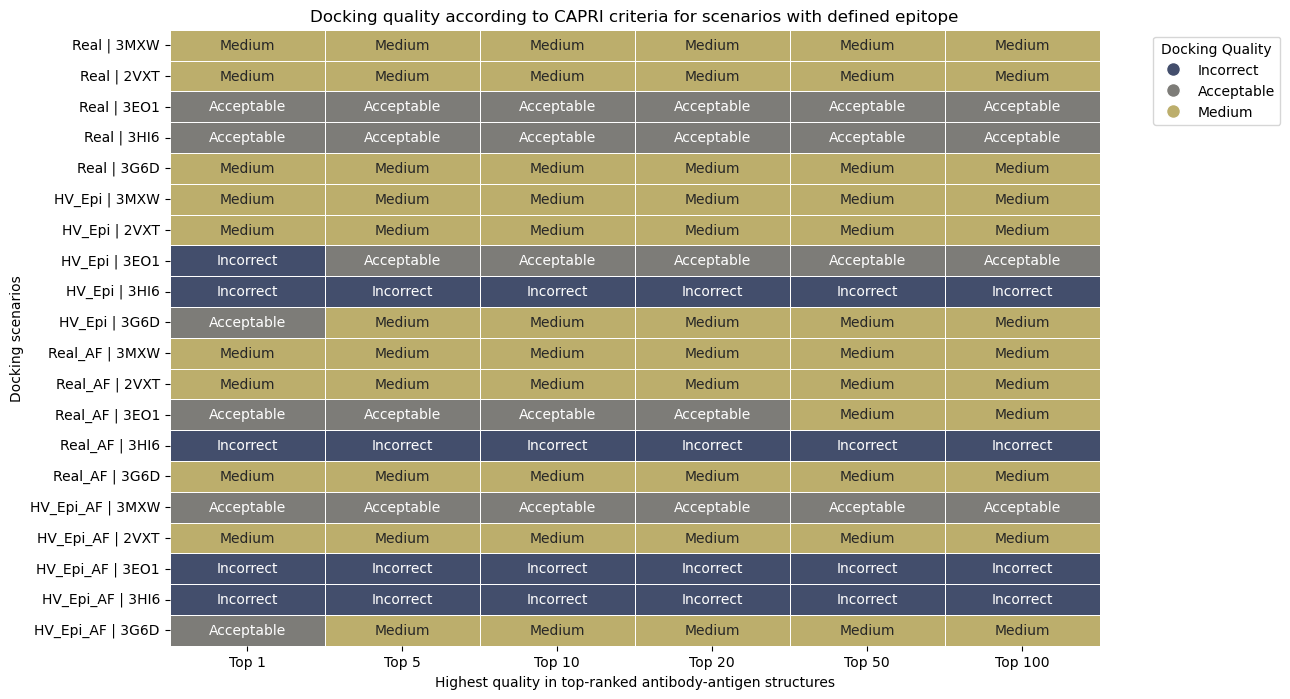

In [7]:
docking_scores_file = os.path.expanduser('~/Analysis_figures/Heatmap/docking_quality_scenarios.csv')
df = pd.read_csv(docking_scores_file)

# Specify the docking scenarios and analysed antibody antigen complexes
scenarios = ['HV_Pred-P_AF', 'HV_Pred-A_AF', 'HV_Pred-P', 'HV_Pred-A', 'HV_Epi_AF', 'Real_AF', 'HV_Epi', 'Real']
complex_list = ['3MXW', '2VXT', '3EO1', '3HI6', '3G6D']

scen_csv = {'real': 'Real',
            'hv_epi': 'HV_Epi',
            'AF_REAL': 'Real_AF',
            'hv_epi_af': 'HV_Epi_AF',
            'hv_preda': 'HV_Pred-A',
            'hv_predp': 'HV_Pred-P',
            'hv_preda_af': 'HV_Pred-A_AF',
            'hv_predp_af': 'HV_Pred-P_AF'
            }

# Docking categories
categories = ['Incorrect', 'Acceptable', 'Medium']

df['Scenario'] = df['Complex_scenario'].str[5:]
df['Scenario'] = df['Scenario'].map(scen_csv.get)
df['Complex'] = df['Complex_scenario'].str[:4]
df['Labels'] = df['Scenario'] + ' | ' + df['Complex']
df.set_index('Labels', inplace=True)
df['Scenario'] = pd.Categorical(df['Scenario'], categories=scenarios, ordered=True)
df['Complex'] = pd.Categorical(df['Complex'], categories=complex_list, ordered=True)
df = df.sort_values(['Scenario', 'Complex'], ascending=[False, True])

# Split data frame according to scenarios
real_scenarios = ['Real', 'HV_Epi', 'Real_AF', 'HV_Epi_AF']
df = df[df['Scenario'].isin(real_scenarios)]

# Define a colormap according to docking categories
colors = sns.color_palette("cividis", len(categories))

color_map = {
    'Incorrect': colors[0],
    'Acceptable': colors[1],
    'Medium': colors[2],
    #'High': colors[3]
}

cmap = ListedColormap([color_map[category] for category in categories])
category_to_number = {category: i for i, category in enumerate(categories)}
numeric_df = df.iloc[:, 1:-2].applymap(category_to_number.get)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df, cmap=cmap, annot=df.iloc[:, 1:-2], fmt='', cbar=False, linewidths=0.5)
plt.title('Docking quality according to CAPRI criteria for scenarios with defined epitope')
plt.xlabel('Highest quality in top-ranked antibody-antigen structures')
plt.ylabel('Docking scenarios')
plt.xticks()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
                              markerfacecolor=color_map[category], markersize=10) for category in categories]
plt.legend(handles=legend_elements, title="Docking Quality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('heatmap_docking_scenarios_real.png', format='png')
plt.show()

/tmp/ipykernel_422136/4032501043.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df = df.iloc[:, 1:].applymap(category_to_number.get)


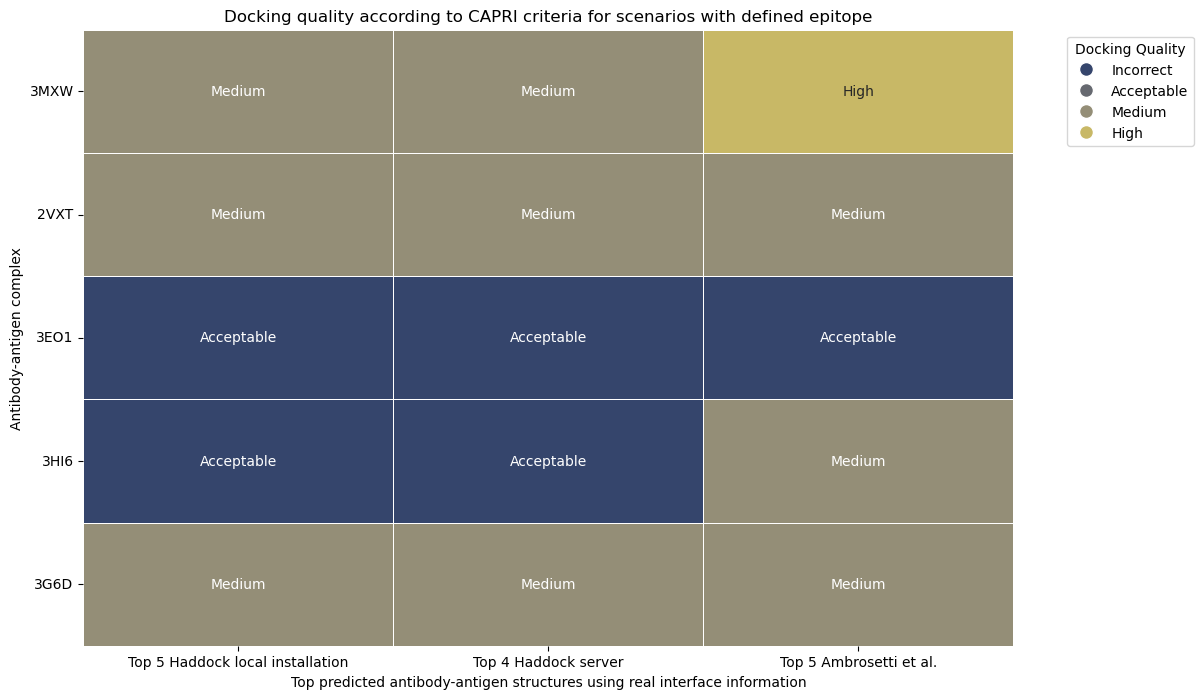

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
import os
docking_scores_file = os.path.expanduser('~/Analysis_figures/Heatmap/server_results.csv')
df = pd.read_csv(docking_scores_file)

# Specify the docking scenarios and analysed antibody antigen complexes
complex_list = ['3MXW', '2VXT', '3EO1', '3HI6', '3G6D']

scen_csv = {'real': 'Real',
            'hv_epi': 'HV_Epi',
            'hv_epi_af': 'HV_Epi_AF',
            'AF_REAL': 'Real_AF',
            'hv_preda': 'HV_Pred-A',
            'hv_predp': 'HV_Pred-P',
            'hv_preda_af': 'HV_Pred-A_AF',
            'hv_predp_af': 'HV_Pred-P_AF'
            }

# Docking categories
categories = ['Incorrect', 'Acceptable', 'Medium', 'High']

df['Labels'] = df['Complex']
df.set_index('Labels', inplace=True)
df['Complex'] = pd.Categorical(df['Complex'], categories=complex_list, ordered=True)

# Define a colormap according to docking categories
colors = sns.color_palette("cividis", len(categories))

color_map = {
    'Incorrect': colors[0],
    'Acceptable': colors[1],
    'Medium': colors[2],
    'High': colors[3]
}

cmap = ListedColormap([color_map[category] for category in categories])
category_to_number = {category: i for i, category in enumerate(categories)}
numeric_df = df.iloc[:, 1:].applymap(category_to_number.get)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df, cmap=cmap, annot=df.iloc[:, 1:], fmt='', cbar=False, linewidths=0.5)
plt.title('Docking quality according to CAPRI criteria for scenarios with defined epitope')
plt.xlabel('Top predicted antibody-antigen structures using real interface information')
plt.ylabel('Antibody-antigen complex')
plt.yticks(rotation=0)
plt.xticks()
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, 
                              markerfacecolor=color_map[category], markersize=10) for category in categories]
plt.legend(handles=legend_elements, title="Docking Quality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('heatmap_docking_scenarios_server.png', format='png')
plt.show()